<a href="https://colab.research.google.com/github/sawsanowa/COVID-19_Vaccination_Sentiment_Analysis/blob/main/Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
import pandas as pd

In [ ]:
data =pd.read_csv('/content/Final_ALL_Labled_012.csv', encoding='utf-8', usecols=['sentiment', 'full_text'])

In [ ]:
data.head()

,sentiment,full_text
0,1,بفضل الله قبل قليل وخلال ٩ دقاءق فقط اخذت لقاح...
1,0,لقاح كورونا اليوم مابدت الاعراض الا بعد ساعه م...
2,1,قبل موعد اخذي الجرعه الاولي من لقاح كورونا ظهر...
3,1,وخذينا الجرعه الاولي الحمدلله لقاح كورونا
4,1,اليوم اخذت الجرعه الاولي من لقاح كورونا عن طري...


In [ ]:
data.sentiment.value_counts()

1    727
2    280
0    116
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.full_text
y = data.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

289    الي قعد يسوقون حق التطعيم اكثر من المطعمين نفس...
353    لقاح كورونا بعضهم كبير يصور وهو ياخذ القاح ويق...
233    غير صحيح مايسجلون لك لقاح كورونا يقولون سجل في...
95     اللهم لك الحمد لقاح كورونا الله ينفع به الجميع...
406    الحمد لله علي نعمه و فضله طعمت اليوم لقاح كورو...
Name: full_text, dtype: object

In [ ]:
len(X_test)

225

In [ ]:
y_train.value_counts()

1    576
2    221
0    101
Name: sentiment, dtype: int64

In [ ]:
y_test.value_counts()

1    151
2     59
0     15
Name: sentiment, dtype: int64

In [ ]:
import sys, os, re, csv, codecs
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Removing stop words
def get_stop_words(path):
    #"stop_words.txt"
    stop_words = []
    with codecs.open(path, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words = [word.strip() for word in stop_words]
    return stop_words
stop_words = get_stop_words('/content/stop_words_arabic.txt')

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [ ]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [ ]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 576), (1, 576), (2, 576)]


In [ ]:
#This is the fit score, and not the actual accuracy score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.7546296296296297

In [ ]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

clf= MultinomialNB()
clf.fit(X_train_res, y_train_res)

score = clf.score(X_train_res, y_train_res)
print("score of Naive Bayes algo is :" , score)

y_pred = clf.predict(X_test_vect)
print(confusion_matrix(y_test,y_pred))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))

score of Naive Bayes algo is : 0.7546296296296297
[[  6   0   9]
 [ 16 113  22]
 [ 12   8  39]]
Precision Score :  0.7022222222222222
Recall Score :  0.7022222222222222


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 11   1  11]
 [ 11 121  19]
 [  7   5  39]]
              precision    recall  f1-score   support

           0       0.38      0.48      0.42        23
           1       0.95      0.80      0.87       151
           2       0.57      0.76      0.65        51

    accuracy                           0.76       225
   macro avg       0.63      0.68      0.65       225
weighted avg       0.81      0.76      0.77       225

0.76


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

[[0.37931034 0.37931034 0.24137931]
 [0.00787402 0.95275591 0.03937008]
 [0.15942029 0.27536232 0.56521739]]


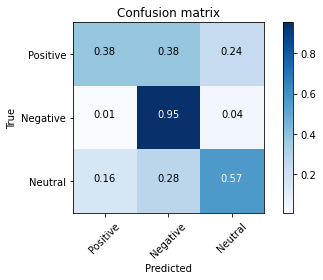

In [ ]:
import numpy
class_labels = ['Positive', 'Negative', 'Neutral']
cm = confusion_matrix(y_test,y_pred).T
plot_confusion_matrix(cm, classes = class_labels)

[[ 11   1  11]
 [ 11 121  19]
 [  7   5  39]]
              precision    recall  f1-score   support

           0       0.38      0.48      0.42        23
           1       0.95      0.80      0.87       151
           2       0.57      0.76      0.65        51

    accuracy                           0.76       225
   macro avg       0.63      0.68      0.65       225
weighted avg       0.81      0.76      0.77       225



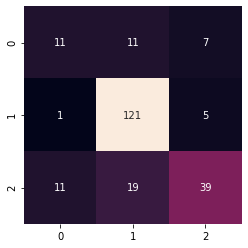

In [ ]:
mat = confusion_matrix(y_test,y_pred)
# Confusion Matrix
print(mat)
# Classification Report
print(classification_report(y_test,y_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels = True, yticklabels = True)